PROYECTO HOSPITALIZACIONES


ANALISIS EXPLORATORIO Y PREPARACIÓN DE DATOS


1. Importación de librerias

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import skew
from math import sqrt
from numpy import mean, var
import copy 

2. Cargamos el Dataset y leemos el dataframe 

In [3]:
#pip install openpyxl

In [4]:
#leemos el dataset y cargamos las primeras 5 filas
df = pd.read_excel('BBDD_Hospitalización.xlsx') 
df.head() 

C:\Users\Angela\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0


In [5]:
df.tail() #cargamos las 5 ultimas de dataset

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
565,69.0,NO,NO,4.43,NaN,NaN,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NaN,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
566,67.0,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
567,59.0,NO,NO,9.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


3. Analisis exploratorio de los datos

a. Entendiendo los datos

In [6]:
# Numero de filas y columas
df.shape

(570, 20)

In [7]:
#Informacion general de df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

In [8]:
# Identificamos columnas categóricas y numéricas
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

print('Número de columnas numéricas:', numeric_data.shape[1])
print('Número de columnas categóricas:', categorical_data.shape[1])

Número de columnas numéricas: 5
Número de columnas categóricas: 15


In [9]:
# Identificamos valores únicos por columna
for col in df.columns:
  print(df[col].unique())
  
  
  #Analizar los valores únicos en cada columna de tu conjunto de datos puede proporcionarte información valiosa sobre la diversidad 
  #de los datos y ayudarte a tomar decisiones sobre cómo manipularlos y tratar con valores atípicos, valores faltantes u otras características 
  # específicas de los datos.

[ 53.  56.  57.  55.  67.  69.  44.  54.  68.  43.  65.  62.  71.  64.
  77.  75.  73.  63.  66.  84.  42.  61.  47.  48.  49.  81.  52.  74.
  70.  58.  59.  60.  50. 143. 151.  76.  78.  46.  51.  79.  39.  72.
  80.  45.  82.  nan]
['NO' 'SI' nan]
['NO' 'SI' nan]
[  4.     7.7   29.     7.     6.2    6.      nan   5.7    4.3    5.19
   4.5   14.    10.     9.    25.    91.8   21.    98.     7.5   10.8
  10.5   90.     5.1   16.    17.    23.     6.4  100.     5.8   38.9
  20.    40.     9.5    9.6   10.2    8.5   53.    19.     5.6    3.5
  15.     5.2   17.7    4.6    8.     8.7    4.8    7.6   10.6    4.7
  18.    27.     5.     8.39   4.79   6.8    4.9    7.8   16.2    8.3
   6.5    7.2    5.97   6.98  12.    24.     8.9    6.3    9.3   12.6
   5.5   13.8   13.4   11.    21.3    7.1   11.9    3.8   15.6    5.4
  22.    12.8    4.1    2.     9.4    4.49  11.5    5.31  33.6   48.3
   5.11   8.8   26.     0.6   31.    27.6   83.    15.85  20.2   14.9
   2.5    3.9   18.2   28.    33

In [10]:
# Cantidad de valores únicos por columna
df.nunique()

EDAD                                                                          45
DIABETES                                                                       2
HOSPITALIZACIÓN ULTIMO MES                                                     2
PSA                                                                          146
BIOPSIAS PREVIAS                                                               2
VOLUMEN PROSTATICO                                                             2
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                        5
NUMERO DE MUESTRAS TOMADAS                                                    12
CUP                                                                            2
ENF. CRONICA PULMONAR OBSTRUCTIVA                                              4
BIOPSIA                                                                       11
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA      6
FIEBRE                      

b. Limpieza de datos

1. Se quitara alguna columna?

No, no se eliminara ninguna columna por que se consideran que todos los datos son relevantes desde un principio.

2. Transformación de datos

In [11]:
#La columana de 11 llamada Número de dias post biopsia... tiene dos tipos de datos, Númericos y posible dicotomico
conteo_no = df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].value_counts()['NO']
conteo_no

# de los 570 registros del df, 542 presentan el valor 'NO' en dicha columna por lo que se hace necesario
# efectuar un reemplazo y normalización de los valores

542

In [12]:
# Reemplazamos valores numéricos por 'SI' y cambiamos el nombre de la columna
df['Infeccion_post_biopsia'] = np.where(pd.to_numeric(df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'], errors='coerce').notnull(), 'Si', df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'])
df['Infeccion_post_biopsia'].unique()
#df['Infeccion_post_biopsia'].head(30)

array(['Si', 'NO', nan], dtype=object)

In [13]:
#se cambian los nombres de las columnas para simplificar y dar mejor manejo de df
df.columns

Index(['EDAD', 'DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'PSA',
       'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO',
       'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS', 'NUMERO DE MUESTRAS TOMADAS',
       'CUP', 'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA',
       'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA',
       'FIEBRE', 'ITU', 'TIPO DE CULTIVO', 'AGENTE AISLADO',
       'PATRON DE RESISTENCIA', 'HOSPITALIZACION', 'DIAS HOSPITALIZACION MQ',
       'DIAS HOSPITALIZACIÓN UPC', 'Infeccion_post_biopsia'],
      dtype='object')

In [14]:
df.rename(columns={ 'EDAD': 'Edad', 
                    'DIABETES': 'Diabetes',
                    'HOSPITALIZACIÓN ULTIMO MES': 'Hospitalizacion_ultimo_mes',
                    'PSA': 'Antigeno_prostatico',
                    'BIOPSIAS PREVIAS': 'Biopsia_previa',
                    'VOLUMEN PROSTATICO': 'Volumen_prostatico',
                    'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS': 'Antibiotico_profilaxis',
                    'NUMERO DE MUESTRAS TOMADAS': 'Nro_muestras',
                    'CUP': 'Cateter_biopsia',
                    'ENF. CRONICA PULMONAR OBSTRUCTIVA': 'Enfermedad_pulmonar_cronica',
                    'BIOPSIA': 'Resultado_biopsia',
                    'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA': 'Dias_infeccion_post_biopsia',
                    'FIEBRE': 'Fiebre',
                    'ITU': 'Infeccion_urinaria',
                    'TIPO DE CULTIVO': 'Tipo_cultivo',
                    'AGENTE AISLADO': 'Agente_aislado',
                    'PATRON DE RESISTENCIA': 'Patron_resistencia',
                    'HOSPITALIZACION': 'Hospitalizacion',
                    'DIAS HOSPITALIZACION MQ': 'Dias_hospitalizacion_quirurgico',
                    'DIAS HOSPITALIZACIÓN UPC': 'Dias_hospitalizacion_critico'
}, inplace=True)
df.head()

,Edad,Diabetes,Hospitalizacion_ultimo_mes,Antigeno_prostatico,Biopsia_previa,Volumen_prostatico,Antibiotico_profilaxis,Nro_muestras,Cateter_biopsia,Enfermedad_pulmonar_cronica,...,Dias_infeccion_post_biopsia,Fiebre,Infeccion_urinaria,Tipo_cultivo,Agente_aislado,Patron_resistencia,Hospitalizacion,Dias_hospitalizacion_quirurgico,Dias_hospitalizacion_critico,Infeccion_post_biopsia
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,...,1,SI,NO,NO,NO,NO,SI,2.0,0.0,Si
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,...,1,SI,NO,NO,NO,NO,SI,5.0,0.0,Si
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,...,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0,Si
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,...,1,SI,NO,NO,NO,NO,SI,5.0,0.0,Si
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,...,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0,Si


In [15]:
# Normalizamos los valores de 'enfermedad_pulmonar_cronica'

df['Enfermedad_pulmonar_cronica'].unique()

array(['NO', 'SI, EPOC', 'SI, ASMA', 'SI', nan], dtype=object)

In [16]:
conteo_asma = df['Enfermedad_pulmonar_cronica'].value_counts()['SI, ASMA']
conteo_asma

4

In [17]:
conteo_epoc = df['Enfermedad_pulmonar_cronica'].value_counts()['SI, EPOC']
conteo_epoc

4

In [18]:
# Al no ser representativa la cantidad de valores de asma y epoc, normalizamos en SI y NO

df = df.replace(    {'Enfermedad_pulmonar_cronica':
                    {'SI, ASMA': 'SI',
                    'SI, EPOC': 'SI',}
                    })
df['Enfermedad_pulmonar_cronica'].unique()

array(['NO', 'SI', nan], dtype=object)

In [19]:
# Normalizamos los valores de la columna 'Resultado_biopsia'
df.Resultado_biopsia.unique()

array(['NEG', 'ADENOCARCINOMA GLEASON 6 ', 'ADENOCARCINOMA GLEASON 7 ',
       'ADENOCARCINOMA GLEASON 6', 'ADENOCARCINOMA GLEASON 10 ',
       'ADENOCARCINOMA GLEASON 9 ', 'ADENOCARCINOMA GLEASON 8 ',
       'PROSTATITIS', 'HIPERPLASIA PROSTATICA',
       'ADENOCARCINOMA GLEASON 7',
       'CARCINOMA INDIFERENCIADO DE CELULAS CLARAS', nan], dtype=object)

In [20]:
df = df.replace(    {'Resultado_biopsia':
                    {'NEG': 'NEGATIVO',
                    'ADENOCARCINOMA GLEASON 6 ': 'ADENOCARCINOMA GLEASON 6',
                    'ADENOCARCINOMA GLEASON 7 ': 'ADENOCARCINOMA GLEASON 7',
                    'ADENOCARCINOMA GLEASON 10 ': 'ADENOCARCINOMA GLEASON 10',
                    'ADENOCARCINOMA GLEASON 9 ': 'ADENOCARCINOMA GLEASON 9',
                    'ADENOCARCINOMA GLEASON 8 ': 'ADENOCARCINOMA GLEASON 8'
                    }
                    })
df['Resultado_biopsia'].unique()

array(['NEGATIVO', 'ADENOCARCINOMA GLEASON 6', 'ADENOCARCINOMA GLEASON 7',
       'ADENOCARCINOMA GLEASON 10', 'ADENOCARCINOMA GLEASON 9',
       'ADENOCARCINOMA GLEASON 8', 'PROSTATITIS',
       'HIPERPLASIA PROSTATICA',
       'CARCINOMA INDIFERENCIADO DE CELULAS CLARAS', nan], dtype=object)

In [21]:
# Normalizamos los valores de la columna 'antibiotico_profilaxis'
df.Antibiotico_profilaxis.unique()

array(['FLUOROQUINOLONA_AMINOGLICOSIDO', 'CEFALOSPORINA_AMINOGLUCOCIDO',
       'OROQUINOLONAS', 'FLUOROQUINOLONA_AMINOGLICÓSIDO', 'OTROS', nan],
      dtype=object)

In [22]:
df = df.replace('FLUOROQUINOLONA_AMINOGLICÓSIDO','FLUOROQUINOLONA_AMINOGLICOSIDO')
df.Antibiotico_profilaxis.unique()

array(['FLUOROQUINOLONA_AMINOGLICOSIDO', 'CEFALOSPORINA_AMINOGLUCOCIDO',
       'OROQUINOLONAS', 'OTROS', nan], dtype=object)

In [23]:
# Normalizamos los valores de la columna 'agente_aislado'
df.Agente_aislado.unique()

array(['NO', 'E.COLI', 'PSEUDOMONAS AERUGINOSA', nan], dtype=object)

In [24]:
df = df.replace('E.COLI','ESCHERICHIA COLI')
df.Agente_aislado.unique()

array(['NO', 'ESCHERICHIA COLI', 'PSEUDOMONAS AERUGINOSA', nan],
      dtype=object)

3. Quitamos datos duplicados

In [25]:
# Buscamos filas con valores duplicados
duplicados = df[df.duplicated()] 
duplicados

,Edad,Diabetes,Hospitalizacion_ultimo_mes,Antigeno_prostatico,Biopsia_previa,Volumen_prostatico,Antibiotico_profilaxis,Nro_muestras,Cateter_biopsia,Enfermedad_pulmonar_cronica,...,Dias_infeccion_post_biopsia,Fiebre,Infeccion_urinaria,Tipo_cultivo,Agente_aislado,Patron_resistencia,Hospitalizacion,Dias_hospitalizacion_quirurgico,Dias_hospitalizacion_critico,Infeccion_post_biopsia
32,73.0,NO,NO,7.5,NO,SI,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,SI,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
42,62.0,NO,NO,16.0,NO,SI,OROQUINOLONAS,12.0,NO,SI,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
43,69.0,NO,NO,17.0,SI,SI,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,SI,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
45,66.0,NO,NO,6.4,NO,SI,OTROS,12.0,NO,SI,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
49,68.0,NO,NO,20.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,SI,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,67.0,NO,NO,8.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
557,59.0,NO,NO,16.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
560,57.0,NO,NO,4.8,NO,NO,OTROS,12.0,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
562,78.0,NO,NO,9.3,NO,SI,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO


In [26]:
# Encontramos 109 registros duplicados
df.duplicated().sum()

109

In [27]:
# Quitamos filas duplicadas al detectar que cada registro duplicado solo se presenta 1 vez
df = df.drop_duplicates()
# Controlamos
df.duplicated().sum()

0

In [28]:
# Controlamos las nuevas dimensiones del dataframe
df.shape

(461, 21)

4. Manejo de valores nulos

In [29]:
df.isna().sum()

Edad                                1
Diabetes                            1
Hospitalizacion_ultimo_mes          1
Antigeno_prostatico                 5
Biopsia_previa                      3
Volumen_prostatico                  2
Antibiotico_profilaxis              1
Nro_muestras                        1
Cateter_biopsia                     2
Enfermedad_pulmonar_cronica         3
Resultado_biopsia                   1
Dias_infeccion_post_biopsia         1
Fiebre                              1
Infeccion_urinaria                  1
Tipo_cultivo                        1
Agente_aislado                     18
Patron_resistencia                  1
Hospitalizacion                     4
Dias_hospitalizacion_quirurgico     1
Dias_hospitalizacion_critico        1
Infeccion_post_biopsia              1
dtype: int64

In [30]:
df[['Agente_aislado']]

,Agente_aislado
0,NO
1,NO
2,ESCHERICHIA COLI
3,NO
4,ESCHERICHIA COLI
...,...
564,NO
565,NO
566,NaN
567,NO


In [31]:
# Detectamos que la columna cuenta con 18 registros nulos. Mirando el dataset, cuando 'Tipo_cultivo' es 'NO'
# 'agente_aislado' es 'NO' en su mayoría. Por ende reemplazamos con este criterio

valor_condicion = 'NO'
nuevo_valor = 'NO'

df.loc[df['Tipo_cultivo'] == valor_condicion, 'Agente_aislado'] = nuevo_valor
df[['Tipo_cultivo', 'Agente_aislado']]

,Tipo_cultivo,Agente_aislado
0,NO,NO
1,NO,NO
2,HEMOCULTIVO,ESCHERICHIA COLI
3,NO,NO
4,HEMOCULTIVO,ESCHERICHIA COLI
...,...,...
564,NO,NO
565,NO,NO
566,NO,NO
567,NO,NO


In [32]:
# Volvemos a controlar los nulos
df.isna().sum()

Edad                               1
Diabetes                           1
Hospitalizacion_ultimo_mes         1
Antigeno_prostatico                5
Biopsia_previa                     3
Volumen_prostatico                 2
Antibiotico_profilaxis             1
Nro_muestras                       1
Cateter_biopsia                    2
Enfermedad_pulmonar_cronica        3
Resultado_biopsia                  1
Dias_infeccion_post_biopsia        1
Fiebre                             1
Infeccion_urinaria                 1
Tipo_cultivo                       1
Agente_aislado                     1
Patron_resistencia                 1
Hospitalizacion                    4
Dias_hospitalizacion_quirurgico    1
Dias_hospitalizacion_critico       1
Infeccion_post_biopsia             1
dtype: int64

In [33]:
df = df.drop(df.index[-1])
df.isna().sum()

Edad                               0
Diabetes                           0
Hospitalizacion_ultimo_mes         0
Antigeno_prostatico                4
Biopsia_previa                     2
Volumen_prostatico                 1
Antibiotico_profilaxis             0
Nro_muestras                       0
Cateter_biopsia                    1
Enfermedad_pulmonar_cronica        2
Resultado_biopsia                  0
Dias_infeccion_post_biopsia        0
Fiebre                             0
Infeccion_urinaria                 0
Tipo_cultivo                       0
Agente_aislado                     0
Patron_resistencia                 0
Hospitalizacion                    3
Dias_hospitalizacion_quirurgico    0
Dias_hospitalizacion_critico       0
Infeccion_post_biopsia             0
dtype: int64

In [34]:
# Al tener pocos valores nulos, decidimos quitarlos del dataset
df.dropna(inplace=True)
df.isna().sum()

Edad                               0
Diabetes                           0
Hospitalizacion_ultimo_mes         0
Antigeno_prostatico                0
Biopsia_previa                     0
Volumen_prostatico                 0
Antibiotico_profilaxis             0
Nro_muestras                       0
Cateter_biopsia                    0
Enfermedad_pulmonar_cronica        0
Resultado_biopsia                  0
Dias_infeccion_post_biopsia        0
Fiebre                             0
Infeccion_urinaria                 0
Tipo_cultivo                       0
Agente_aislado                     0
Patron_resistencia                 0
Hospitalizacion                    0
Dias_hospitalizacion_quirurgico    0
Dias_hospitalizacion_critico       0
Infeccion_post_biopsia             0
dtype: int64

5. Análisis de Outliers

In [35]:
#Identificamos columnas numéricas para detectar posibles outliers

numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

print('Columnas numéricas:\n', list(numeric_data.columns))

Columnas numéricas:
 ['Edad', 'Antigeno_prostatico', 'Nro_muestras', 'Dias_hospitalizacion_quirurgico', 'Dias_hospitalizacion_critico']


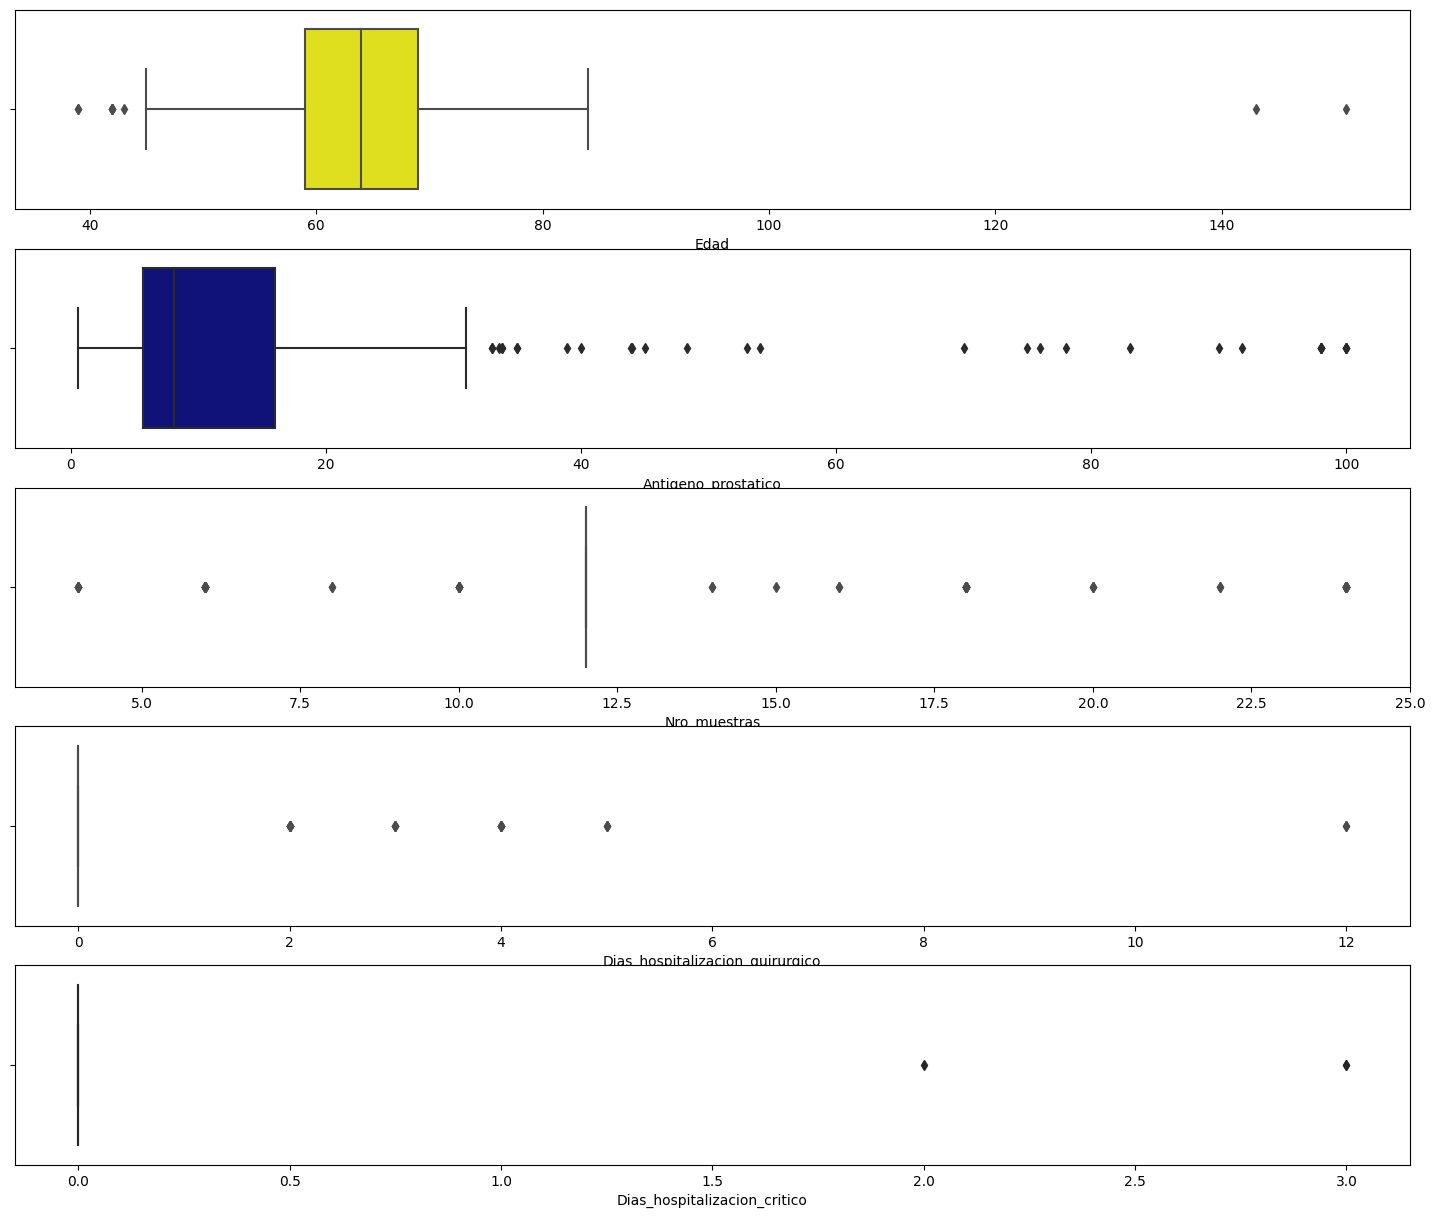

In [36]:
plt.figure(figsize= (18,15))
plt.subplot(5,1,1)
sns.boxplot(x= df.Edad, color='yellow')

plt.subplot(5,1,2)
sns.boxplot(x= df.Antigeno_prostatico, color='darkblue') #PSA

plt.subplot(5,1,3)
sns.boxplot(x= df.Nro_muestras, color='red')

plt.subplot(5,1,4)
sns.boxplot(x= df.Dias_hospitalizacion_quirurgico, color='blue')

plt.subplot(5,1,5)
sns.boxplot(x= df.Dias_hospitalizacion_critico, color='green')

plt.show()

In [37]:
# Observamos outliers en todas las columnas numéricas ############pero evaluaremos más adelante la relevancia de los mismos

a. Analisis descriptivo

In [38]:
# Variables cuantitativas
df.describe()

,Edad,Antigeno_prostatico,Nro_muestras,Dias_hospitalizacion_quirurgico,Dias_hospitalizacion_critico
count,449.000000,449.000000,449.000000,449.000000,449.000000
mean,64.285078,14.167550,12.919822,0.202673,0.017817
std,9.859901,17.154908,3.980172,1.065444,0.220882
min,39.000000,0.600000,4.000000,0.000000,0.000000
25%,59.000000,5.700000,12.000000,0.000000,0.000000
50%,64.000000,8.100000,12.000000,0.000000,0.000000
75%,69.000000,16.000000,12.000000,0.000000,0.000000
max,151.000000,100.000000,24.000000,12.000000,3.000000


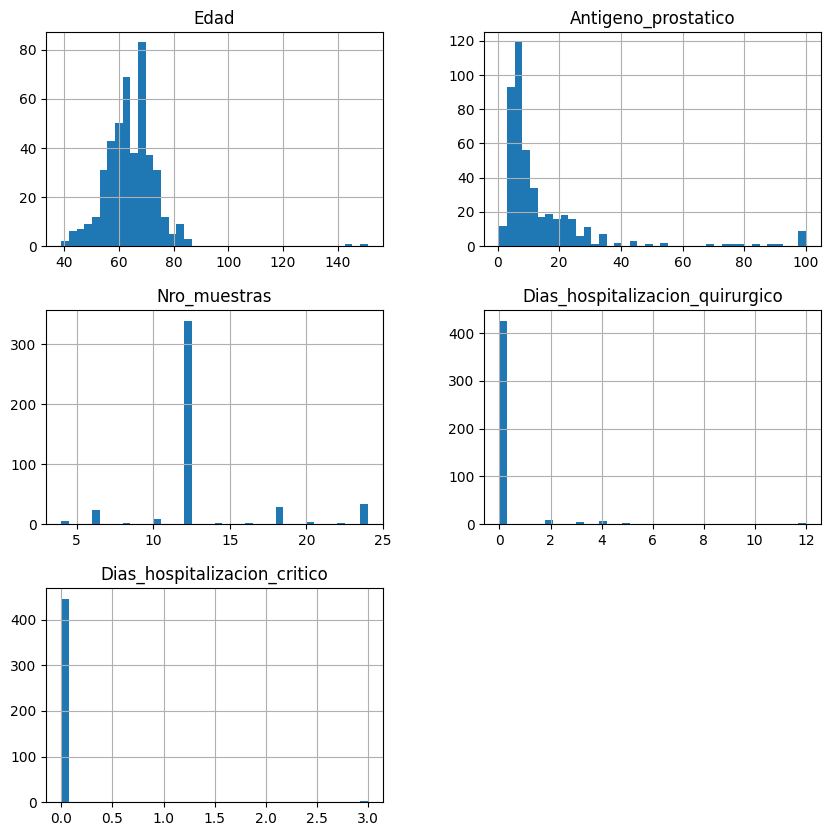

In [39]:
df.hist(bins=40, figsize= (10, 10))
plt.show()

In [40]:
#Las variables a tratar segun el analisis anterios son con "Edad" y "Antigeno_prostatico"

b. Filtración de outliers

In [41]:
#El cálculo de los cuartiles Q1 (primer cuartil) y Q3 (tercer cuartil) se basa en la distribución de los datos y es parte del análisis estadístico. En tu caso, 
# se eligió calcular los cuartiles en los percentiles 25 y 75, respectivamente. Estos valores se utilizan comúnmente debido a que dividen el conjunto de datos 
# en cuatro partes iguales, lo que proporciona una visión útil de la dispersión de los datos.

#La elección de los percentiles 25 y 75 para Q1 y Q3 se deriva de la naturaleza de los cuartiles y su relación con la mediana y la distribución de los datos. 
# Aquí hay una explicación más detallada:

#Q1 (Primer Cuartil): El primer cuartil es el valor que separa el 25% inferior de los datos del 75% superior. Esto significa que el 25% de los datos tiene valores 
# más bajos que Q1 y el 75% de los datos tiene valores más altos que Q1. El valor del primer cuartil (Q1) es el percentil 25.

#Q3 (Tercer Cuartil): El tercer cuartil es el valor que separa el 75% inferior de los datos del 25% superior restante. Esto significa que el 75% de los datos tiene 
# valores más bajos que Q3 y el 25% de los datos tiene valores más altos que Q3. El valor del tercer cuartil (Q3) es el percentil 75.

In [42]:
# interpolation='midpoint', especifica el método de interpolación utilizado para calcular el percentil. En este caso, se utiliza la interpolación por el punto medio.

# El IQR es una métrica útil para comprender la dispersión de los datos y detectar posibles valores atípicos en la distribución de edades.

In [43]:
# IQR 'edad'
Q1 = np.percentile(df['Edad'], 25,              #Calculando primer cuartil
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['Edad'], 75,             #calcula el tercer cuartil
                   interpolation = 'midpoint')
IQR = Q3 - Q1
print(f"El rango intercuartílico (IQR) de edad es {IQR}")

El rango intercuartílico (IQR) de edad es 10.0


C:\Users\Angela\AppData\Local\Temp\ipykernel_16992\1498748373.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['Edad'], 25,              #Calculando primer cuartil
C:\Users\Angela\AppData\Local\Temp\ipykernel_16992\1498748373.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['Edad'], 75,             #calcula el tercer cuartil


In [44]:
#Los límites del rango intercuartílico (IQR) se utilizan para identificar posibles valores atípicos en un conjunto de datos. Los límites inferiores y superiores 
# se calculan a partir de los cuartiles Q1 y Q3, respectivamente, sumándoles o restandoles un múltiplo del IQR. El valor más comúnmente utilizado para este múltiplo es 1.5,
# pero en tu caso mencionaste que quieres usar un IQR de 10. Aquí está cómo puedes calcular los límites utilizando un IQR de 10:

In [45]:
#Limites en 'Edad'
limite_inferior = Q1 - 1.5*IQR
limite_superior = Q3 + 1.5*IQR
print(limite_inferior, limite_superior)

44.0 84.0


In [46]:
#Filtramos
df[(df['Edad']<limite_inferior) | (df['Edad']>limite_superior)]

,Edad,Diabetes,Hospitalizacion_ultimo_mes,Antigeno_prostatico,Biopsia_previa,Volumen_prostatico,Antibiotico_profilaxis,Nro_muestras,Cateter_biopsia,Enfermedad_pulmonar_cronica,...,Dias_infeccion_post_biopsia,Fiebre,Infeccion_urinaria,Tipo_cultivo,Agente_aislado,Patron_resistencia,Hospitalizacion,Dias_hospitalizacion_quirurgico,Dias_hospitalizacion_critico,Infeccion_post_biopsia
13,43.0,NO,NO,6.0,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,...,2,NO,NO,NO,NO,NO,SI,3.0,0.0,Si
55,42.0,NO,NO,8.5,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
56,42.0,NO,NO,53.0,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
159,42.0,NO,NO,6.0,NO,NO,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
161,143.0,SI,NO,6.8,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
181,151.0,NO,NO,5.7,NO,SI,OTROS,12.0,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
224,39.0,NO,NO,3.6,NO,NO,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
309,42.0,NO,NO,8.5,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,...,NO,SI,NO,NO,NO,NO,NO,0.0,0.0,NO
310,42.0,NO,NO,54.0,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
481,39.0,NO,NO,3.9,NO,NO,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO


In [47]:
#la edad presenta una distribución normal sin los valores de outliers, se reemplaza los 2 outliers más alejados por el promedio de la distribución

media_edad = np.mean(df.Edad)
df.loc[[161, 181], 'Edad'] = media_edad

In [48]:
#verificamos
df[(df['Edad']<limite_inferior) | (df['Edad']>limite_superior)]

,Edad,Diabetes,Hospitalizacion_ultimo_mes,Antigeno_prostatico,Biopsia_previa,Volumen_prostatico,Antibiotico_profilaxis,Nro_muestras,Cateter_biopsia,Enfermedad_pulmonar_cronica,...,Dias_infeccion_post_biopsia,Fiebre,Infeccion_urinaria,Tipo_cultivo,Agente_aislado,Patron_resistencia,Hospitalizacion,Dias_hospitalizacion_quirurgico,Dias_hospitalizacion_critico,Infeccion_post_biopsia
13,43.0,NO,NO,6.0,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,...,2,NO,NO,NO,NO,NO,SI,3.0,0.0,Si
55,42.0,NO,NO,8.5,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
56,42.0,NO,NO,53.0,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
159,42.0,NO,NO,6.0,NO,NO,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
224,39.0,NO,NO,3.6,NO,NO,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
309,42.0,NO,NO,8.5,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,...,NO,SI,NO,NO,NO,NO,NO,0.0,0.0,NO
310,42.0,NO,NO,54.0,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
481,39.0,NO,NO,3.9,NO,NO,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO


In [49]:
print(df.Edad[161],df.Edad[181])

64.28507795100222 64.28507795100222


array([[<Axes: title={'center': 'Edad'}>]], dtype=object)

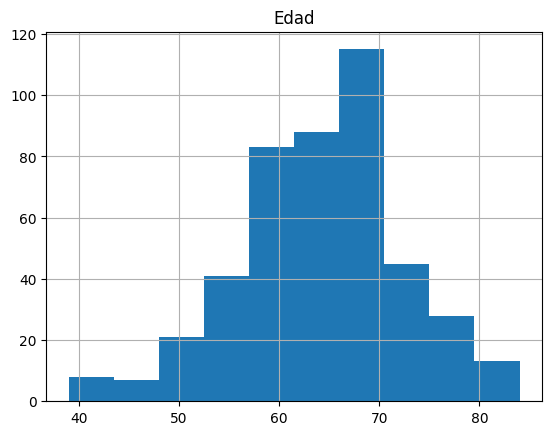

In [50]:
#Reviso nuevamente edad en la distribución y el boxplot
df.hist('Edad')


<Axes: xlabel='Edad'>

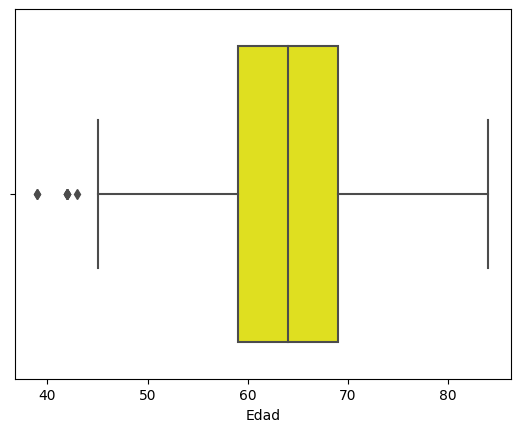

In [51]:
#Se detectan algunos outliers, no son considerados estrictamente atípicos
sns.boxplot(x= df.Edad, color='yellow')

In [52]:
#IQR 'Antigeno_prostatico'
Q1 = np.percentile(df['Antigeno_prostatico'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['Antigeno_prostatico'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
print(f"El rango intercuartílico (IQR) de Antigeno_prostatico es {IQR}")

#Limites en 'antigeno_prostatico'
limite_inferior_antigeno = Q1 - 1.5*IQR
limite_superior_antigeno = Q3 + 1.5*IQR
print(limite_inferior_antigeno, limite_superior_antigeno)

#Filtramos
outliers_antigeno = df[(df['Antigeno_prostatico']<limite_inferior_antigeno) | (df['Antigeno_prostatico']>limite_superior_antigeno)]
outliers_antigeno

El rango intercuartílico (IQR) de Antigeno_prostatico es 10.3
-9.75 31.450000000000003


C:\Users\Angela\AppData\Local\Temp\ipykernel_16992\2276189704.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['Antigeno_prostatico'], 25,
C:\Users\Angela\AppData\Local\Temp\ipykernel_16992\2276189704.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['Antigeno_prostatico'], 75,


,Edad,Diabetes,Hospitalizacion_ultimo_mes,Antigeno_prostatico,Biopsia_previa,Volumen_prostatico,Antibiotico_profilaxis,Nro_muestras,Cateter_biopsia,Enfermedad_pulmonar_cronica,...,Dias_infeccion_post_biopsia,Fiebre,Infeccion_urinaria,Tipo_cultivo,Agente_aislado,Patron_resistencia,Hospitalizacion,Dias_hospitalizacion_quirurgico,Dias_hospitalizacion_critico,Infeccion_post_biopsia
27,77.0,NO,NO,91.8,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,6.0,NO,SI,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
29,77.0,NO,NO,98.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,6.0,NO,SI,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
34,53.0,NO,NO,90.0,NO,SI,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,SI,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
40,53.0,NO,NO,100.0,NO,SI,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,SI,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
46,84.0,NO,NO,38.9,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,6.0,SI,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
48,84.0,NO,NO,40.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,6.0,SI,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
56,42.0,NO,NO,53.0,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
77,54.0,NO,NO,98.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,6.0,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
111,68.0,NO,NO,98.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
114,64.0,NO,NO,100.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO


In [53]:
#Al observar que 'Antigeno_prostatico' presenta una distribución sesgada a la derecha, Se reemplaza los outliers por la mediana de la distribución

mediana_antigeno = np.median(df.Antigeno_prostatico)
lista_indices = outliers_antigeno.index.tolist()
df.loc[lista_indices, "Antigeno_prostatico"] = mediana_antigeno


array([[<Axes: title={'center': 'Antigeno_prostatico'}>]], dtype=object)

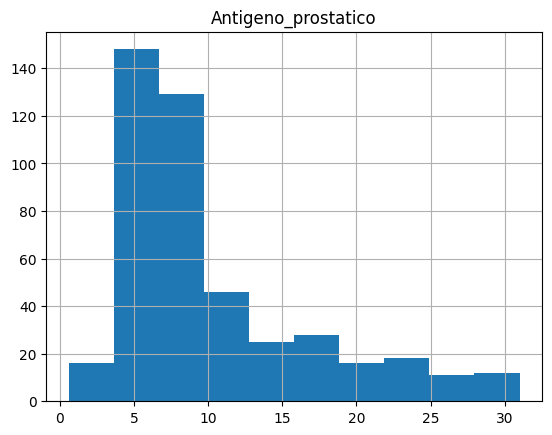

In [54]:
#Volvemos a revisar la distribución y el boxplot
df.hist('Antigeno_prostatico')

<Axes: xlabel='Antigeno_prostatico'>

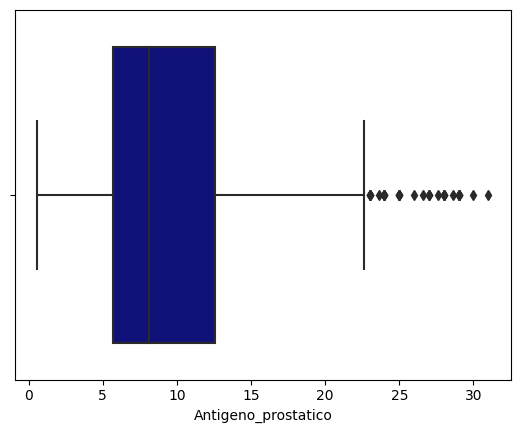

In [55]:
#Si bien la distribución continúa presentando outliers, los consideramos para el análisis
sns.boxplot(x= df.Antigeno_prostatico, color='darkblue')

In [56]:
df.shape

(449, 21)

C. Graficos de barras

In [57]:
#Identificamos columnas catégoricas

categorical_data = df.select_dtypes(exclude=[np.number])

print('Columnas catégoricas:\n', list(categorical_data.columns))

Columnas catégoricas:
 ['Diabetes', 'Hospitalizacion_ultimo_mes', 'Biopsia_previa', 'Volumen_prostatico', 'Antibiotico_profilaxis', 'Cateter_biopsia', 'Enfermedad_pulmonar_cronica', 'Resultado_biopsia', 'Dias_infeccion_post_biopsia', 'Fiebre', 'Infeccion_urinaria', 'Tipo_cultivo', 'Agente_aislado', 'Patron_resistencia', 'Hospitalizacion', 'Infeccion_post_biopsia']


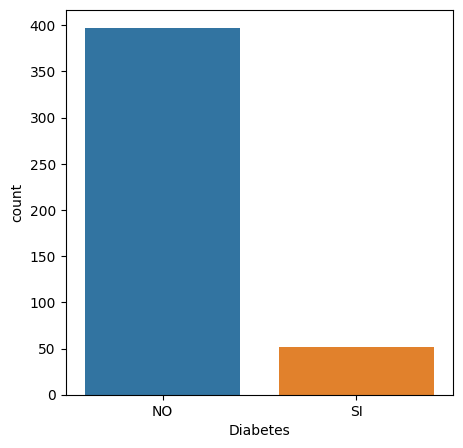

In [58]:
plt.figure(figsize=(5,5))
sns.countplot(x='Diabetes', data=df) 
plt.show()

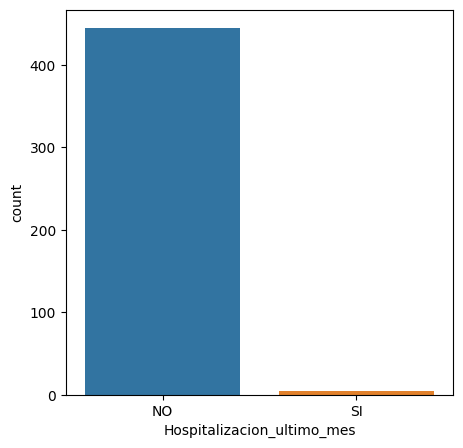

In [59]:
plt.figure(figsize=(5,5))
sns.countplot(x='Hospitalizacion_ultimo_mes', data=df) 
plt.show()

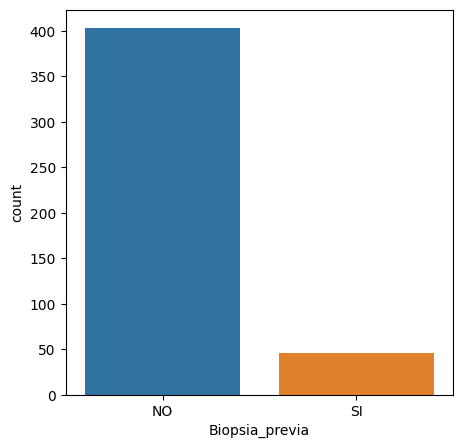

In [60]:
plt.figure(figsize=(5,5))
sns.countplot(x='Biopsia_previa', data=df) 
plt.show()

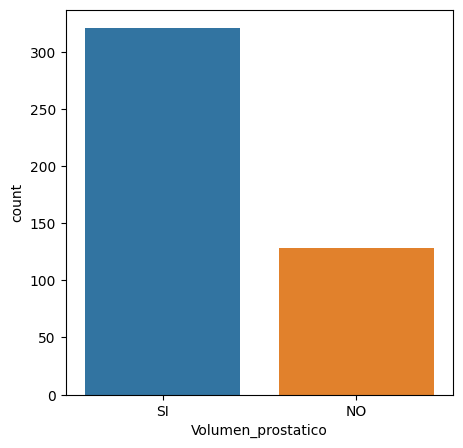

In [61]:
plt.figure(figsize=(5,5))
sns.countplot(x='Volumen_prostatico', data=df) 
plt.show()

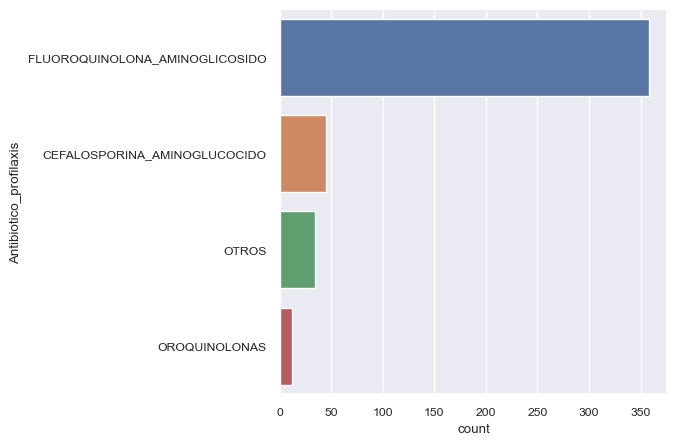

In [62]:
plt.figure(figsize=(5,5))
sns.set(font_scale=0.8)
sns.countplot(y='Antibiotico_profilaxis', data=df, order=df['Antibiotico_profilaxis'].value_counts().sort_values(ascending=False).index)
plt.show()

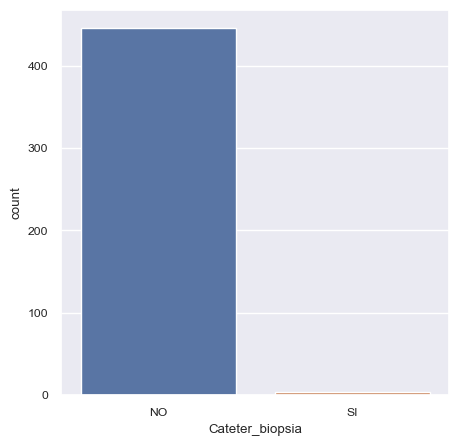

In [63]:
plt.figure(figsize=(5,5))
sns.countplot(x='Cateter_biopsia', data=df) 
plt.show()

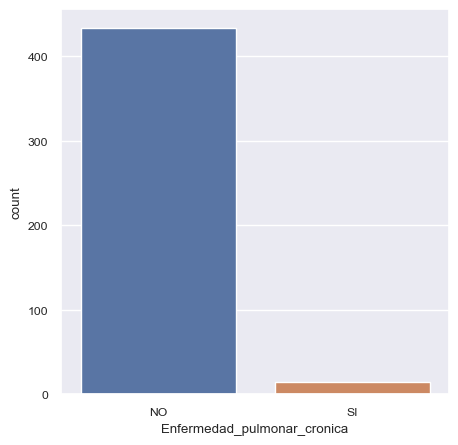

In [64]:
plt.figure(figsize=(5,5))
sns.countplot(x='Enfermedad_pulmonar_cronica', data=df) 
plt.show()

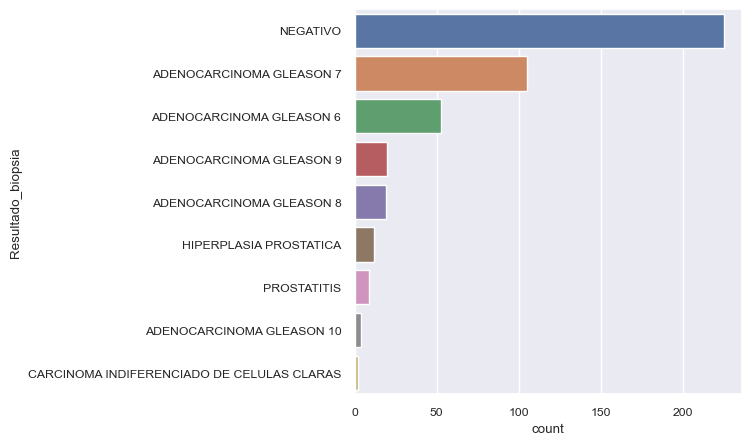

In [65]:
plt.figure(figsize=(5,5))
sns.set(font_scale=0.8)
sns.countplot(y='Resultado_biopsia', data=df, order=df['Resultado_biopsia'].value_counts().sort_values(ascending=False).index)
plt.show()

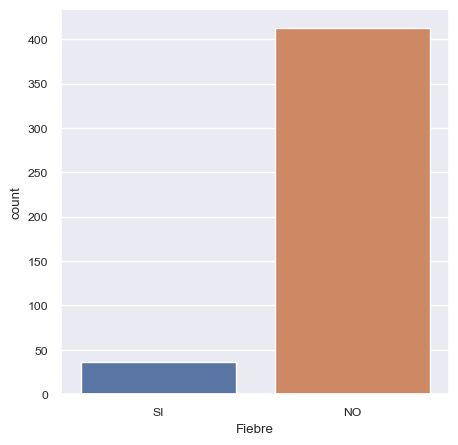

In [66]:
plt.figure(figsize=(5,5))
sns.countplot(x='Fiebre', data=df) 
plt.show()

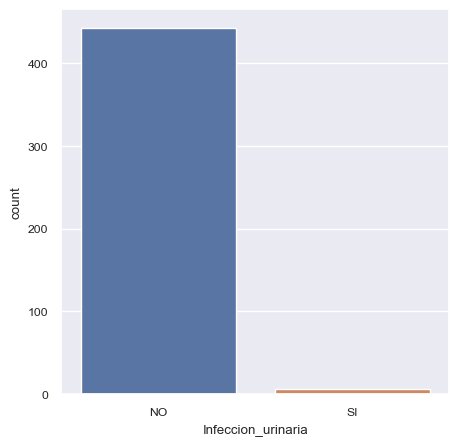

In [67]:
plt.figure(figsize=(5,5))
sns.countplot(x='Infeccion_urinaria', data=df) 
plt.show()

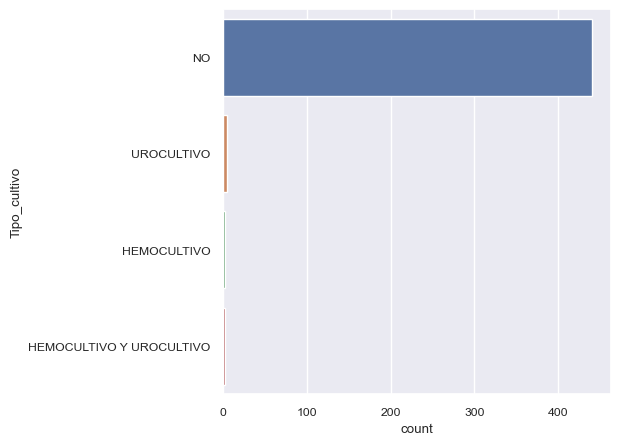

In [68]:
plt.figure(figsize=(5,5))
sns.countplot(y='Tipo_cultivo', data=df, order=df['Tipo_cultivo'].value_counts().sort_values(ascending=False).index) 
plt.show()

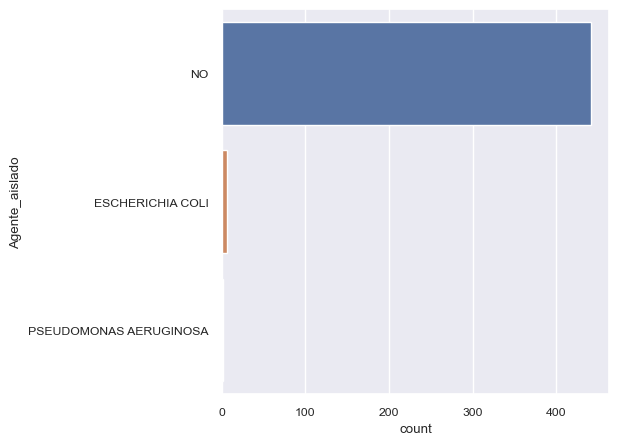

In [69]:
plt.figure(figsize=(5,5))
sns.countplot(y='Agente_aislado', data=df) 
plt.show()

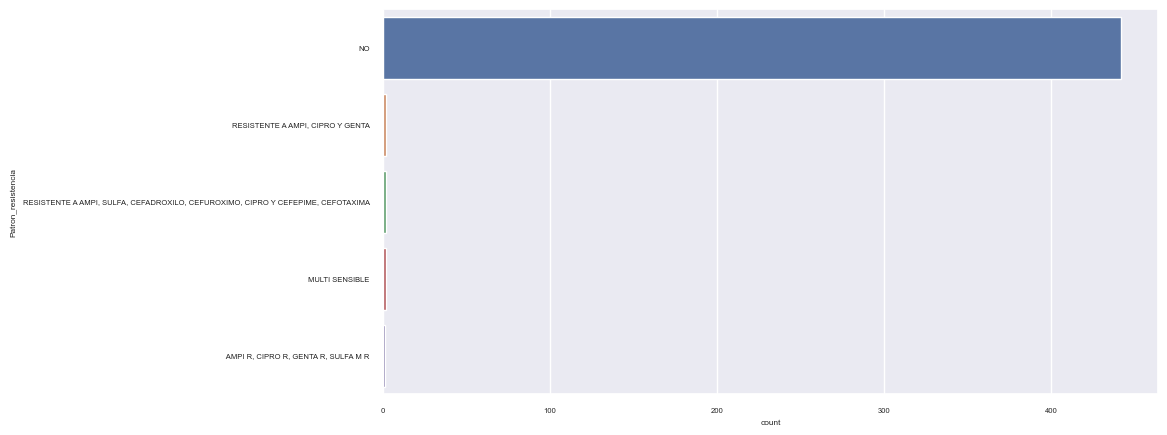

In [70]:
plt.figure(figsize=(10,5))
sns.set(font_scale=0.5)
sns.countplot(y='Patron_resistencia', data=df, order=df['Patron_resistencia'].value_counts().sort_values(ascending=False).index)
plt.show()

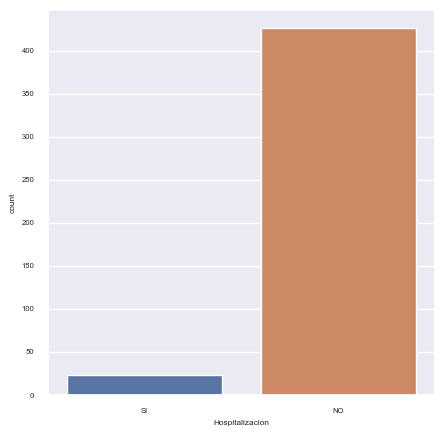

In [71]:
plt.figure(figsize=(5,5))
sns.countplot(x='Hospitalizacion', data=df) 
plt.show()

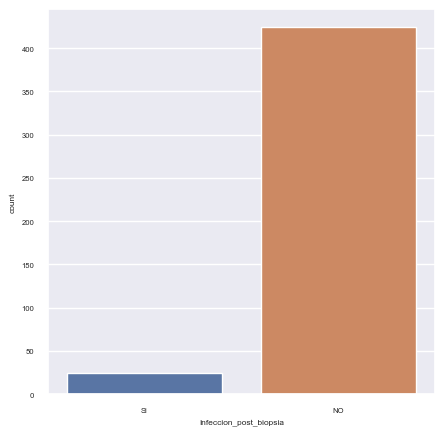

In [72]:
plt.figure(figsize=(5,5))
sns.countplot(x='Infeccion_post_biopsia', data=df) 
plt.show()

d. Tablas cruzadas

In [73]:
#Identificamos columnas catégoricas

categorical_data = df.select_dtypes(exclude=[np.number])

print('Columnas catégoricas:\n', list(categorical_data.columns))

Columnas catégoricas:
 ['Diabetes', 'Hospitalizacion_ultimo_mes', 'Biopsia_previa', 'Volumen_prostatico', 'Antibiotico_profilaxis', 'Cateter_biopsia', 'Enfermedad_pulmonar_cronica', 'Resultado_biopsia', 'Dias_infeccion_post_biopsia', 'Fiebre', 'Infeccion_urinaria', 'Tipo_cultivo', 'Agente_aislado', 'Patron_resistencia', 'Hospitalizacion', 'Infeccion_post_biopsia']


In [74]:
pd.crosstab(df['Diabetes'], df['Hospitalizacion'], margins=True, margins_name="Total")

Hospitalizacion,NO,SI,Total
Diabetes,,,
NO,379,18,397
SI,47,5,52
Total,426,23,449


In [75]:
pd.crosstab(df['Volumen_prostatico'], df['Hospitalizacion'], margins=True, margins_name="Total")

Hospitalizacion,NO,SI,Total
Volumen_prostatico,,,
NO,123,5,128
SI,303,18,321
Total,426,23,449


In [76]:
pd.crosstab(df['Fiebre'], df['Hospitalizacion'], margins=True, margins_name="Total")

Hospitalizacion,NO,SI,Total
Fiebre,,,
NO,410,3,413
SI,16,20,36
Total,426,23,449


In [77]:
pd.crosstab(df['Infeccion_post_biopsia'], df['Hospitalizacion'], margins=True, margins_name="Total")

Hospitalizacion,NO,SI,Total
Infeccion_post_biopsia,,,
NO,424,0,424
Si,2,23,25
Total,426,23,449


In [78]:
pd.crosstab(df['Agente_aislado'], df['Hospitalizacion'], margins=True, margins_name="Total")

Hospitalizacion,NO,SI,Total
Agente_aislado,,,
ESCHERICHIA COLI,0,6,6
NO,426,15,441
PSEUDOMONAS AERUGINOSA,0,2,2
Total,426,23,449


In [79]:
pd.crosstab(df['Tipo_cultivo'], df['Hospitalizacion'], margins=True, margins_name="Total")

Hospitalizacion,NO,SI,Total
Tipo_cultivo,,,
HEMOCULTIVO,0,2,2
HEMOCULTIVO Y UROCULTIVO,0,2,2
NO,426,15,441
UROCULTIVO,0,4,4
Total,426,23,449


In [80]:
pd.crosstab(df['Resultado_biopsia'], df['Hospitalizacion'], margins=True, margins_name="Total")

Hospitalizacion,NO,SI,Total
Resultado_biopsia,,,
ADENOCARCINOMA GLEASON 10,4,0,4
ADENOCARCINOMA GLEASON 6,51,2,53
ADENOCARCINOMA GLEASON 7,103,2,105
ADENOCARCINOMA GLEASON 8,19,0,19
ADENOCARCINOMA GLEASON 9,20,0,20
CARCINOMA INDIFERENCIADO DE CELULAS CLARAS,2,0,2
HIPERPLASIA PROSTATICA,12,0,12
NEGATIVO,206,19,225
PROSTATITIS,9,0,9


e. Discretazición de variables

In [81]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder() 

In [82]:
#Identificamos columnas catégoricas

categorical_data = df.select_dtypes(exclude=[np.number])
print('Columnas catégoricas:\n', list(categorical_data.columns))

Columnas catégoricas:
 ['Diabetes', 'Hospitalizacion_ultimo_mes', 'Biopsia_previa', 'Volumen_prostatico', 'Antibiotico_profilaxis', 'Cateter_biopsia', 'Enfermedad_pulmonar_cronica', 'Resultado_biopsia', 'Dias_infeccion_post_biopsia', 'Fiebre', 'Infeccion_urinaria', 'Tipo_cultivo', 'Agente_aislado', 'Patron_resistencia', 'Hospitalizacion', 'Infeccion_post_biopsia']


In [83]:
#Agregamos nuevas columnas con valores discretizados (0,1)
df['diabetes'] = le.fit_transform(df['Diabetes'])
df['hospitalizacion_ultimo_mes'] = le.fit_transform(df['Hospitalizacion_ultimo_mes'])
df['biopsia_previa'] = le.fit_transform(df['Biopsia_previa'])
df['volumen_prostatico'] = le.fit_transform(df['Volumen_prostatico'])
df['cateter_biopsia'] = le.fit_transform(df['Cateter_biopsia'])
df['enfermedad_pulmonar_cronica'] = le.fit_transform(df['Enfermedad_pulmonar_cronica'])
df['fiebre'] = le.fit_transform(df['Fiebre'])
df['infeccion_urinaria'] = le.fit_transform(df['Infeccion_urinaria'])
df['hospitalizacion'] = le.fit_transform(df['Hospitalizacion'])
df['infeccion_post_biopsia'] = le.fit_transform(df['Infeccion_post_biopsia'])

In [84]:
#Eliminamos columnas innecesarias
df = df.drop(['Diabetes', 'Hospitalizacion_ultimo_mes', 'Biopsia_previa', 'Volumen_prostatico', 'Cateter_biopsia', 'Enfermedad_pulmonar_cronica', 'Fiebre', 'Infeccion_urinaria', 'Hospitalizacion', 'Infeccion_post_biopsia'], axis = 1)
df.head()

,Edad,Antigeno_prostatico,Antibiotico_profilaxis,Nro_muestras,Resultado_biopsia,Dias_infeccion_post_biopsia,Tipo_cultivo,Agente_aislado,Patron_resistencia,Dias_hospitalizacion_quirurgico,...,diabetes,hospitalizacion_ultimo_mes,biopsia_previa,volumen_prostatico,cateter_biopsia,enfermedad_pulmonar_cronica,fiebre,infeccion_urinaria,hospitalizacion,infeccion_post_biopsia
0,53.0,4.0,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NEGATIVO,1,NO,NO,NO,2.0,...,0,0,0,1,0,0,1,0,1,1
1,56.0,7.7,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NEGATIVO,1,NO,NO,NO,5.0,...,0,0,0,1,0,0,1,0,1,1
2,57.0,29.0,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NEGATIVO,1,HEMOCULTIVO,ESCHERICHIA COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",4.0,...,0,0,1,1,0,0,1,0,1,1
3,56.0,7.0,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NEGATIVO,1,NO,NO,NO,5.0,...,0,0,0,1,0,0,1,0,1,1
4,55.0,29.0,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NEGATIVO,1,HEMOCULTIVO,ESCHERICHIA COLI,NO,4.0,...,0,0,1,1,0,0,1,0,1,1


In [85]:
df.shape

(449, 21)

F. Matriz de correlación

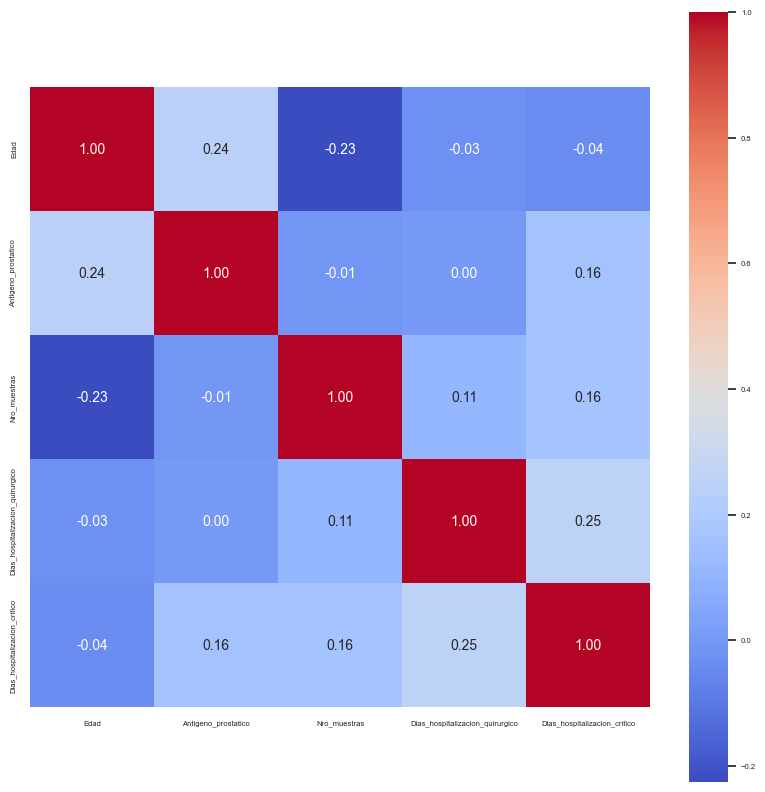

In [86]:
col_corr = ['Edad', 'Antigeno_prostatico', 'Nro_muestras', 'Dias_hospitalizacion_quirurgico', 'Dias_hospitalizacion_critico']
corr = df[col_corr].corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr, cbar=True, square=True, annot=True, fmt='.2f', annot_kws={'size': 10},
            xticklabels=col_corr,
            yticklabels=col_corr,
            cmap='coolwarm')
plt.show()

Pairplots

C:\Users\Angela\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
C:\Users\Angela\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
C:\Users\Angela\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
C:\Users\Angela\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python31

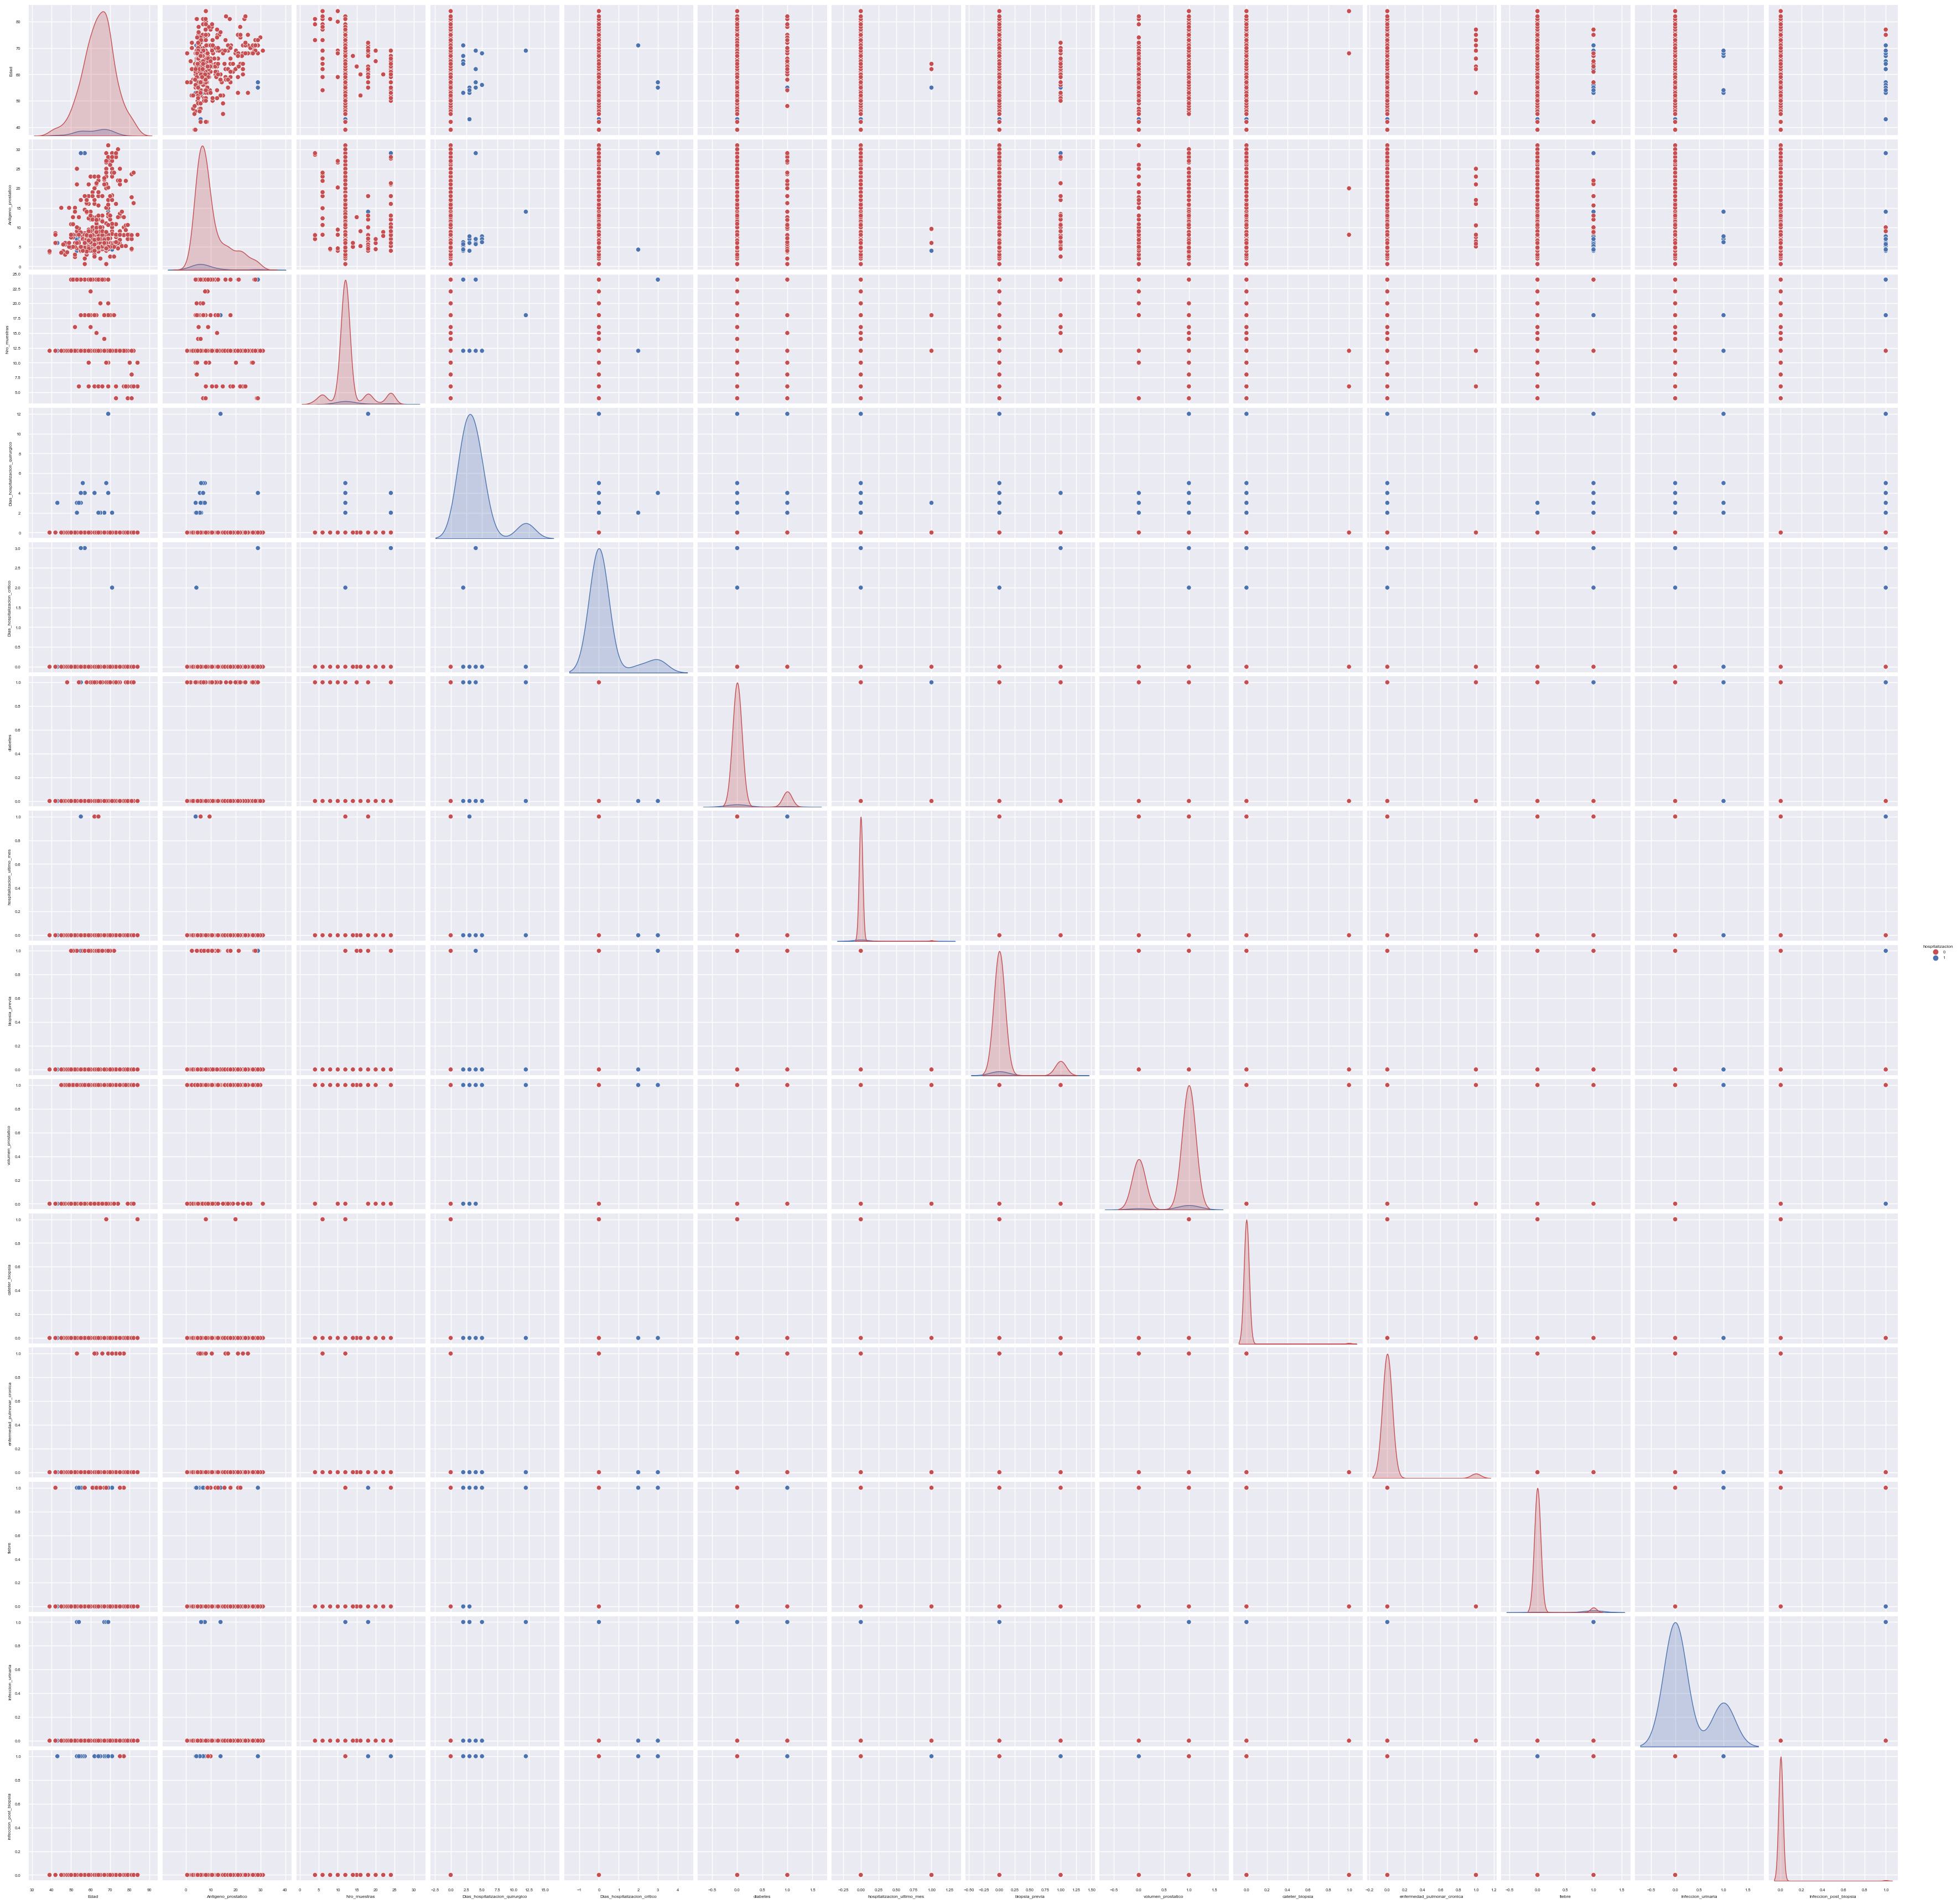

In [87]:
sns.pairplot(df, hue="hospitalizacion", palette = ['r', 'b', 'g'])
plt.show()

4. Modelamieto

a. Arbol

In [88]:
#Se elije 2 atributos para predecir la etiqueta 'hospitalizacion': 'Antigeno_prostatico' y 'Edad'

X = df[['Antigeno_prostatico', 'Edad']]  # Denotamos X con mayúscula ya que incluye más de un atributo
y = df.hospitalizacion # Etiqueta a predecir

In [89]:
X.head()

,Antigeno_prostatico,Edad
0,4.0,53.0
1,7.7,56.0
2,29.0,57.0
3,7.0,56.0
4,29.0,55.0


In [90]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: hospitalizacion, dtype: int32

In [91]:
# Importación de librerías

from IPython.display import clear_output
#importamos los métodos de clasificación
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#importamos exactitud y validación cruzada
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

In [92]:
# Creamos listas para incorporarles valores de la media de exactitud tanto para conjunto de entrenamiento como de evaluación. También vamos a grabar la desviación estándar

tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

#creamos una lista de profundidades del 1 al 19.
profundidades = np.arange(1,20,1)
i = 0
i_max = len(profundidades)
#iteramos con varios modelos
for profundidad in profundidades:
    i = i + 1
    clf = DecisionTreeClassifier(max_depth=profundidad) #el hiperparametro va a ir cambiando de acuerdo a los valores de la lista
    tree_scores = cross_validate(clf, X, y, cv=5, return_train_score=True, n_jobs = -1) #cv=5 es el numero de folios para hacer la validación cruzada
    
    #agregamos las medias y desv. est.
    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_train_scores_std.append(tree_scores['train_score'].std())
    
    tree_test_scores_mean.append(tree_scores['test_score'].mean())
    tree_test_scores_std.append(tree_scores['test_score'].std())
    
    clear_output(wait=True)
    print('Completado: ' + str(round(i / i_max * 100, 2)) + '%')

tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_train_scores_std = np.array(tree_train_scores_std)
tree_test_scores_mean = np.array(tree_test_scores_mean)
tree_test_scores_std = np.array(tree_test_scores_std)

Completado: 100.0%


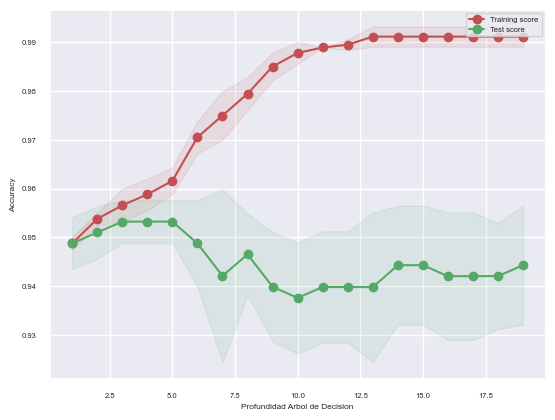

In [93]:
# Visualizamos como varia la exactitud del modelo en base a la profundidad del arbol para conjuntos de entrenamiento y evaluación

plt.fill_between(profundidades, tree_train_scores_mean - tree_train_scores_std,
                 tree_train_scores_mean + tree_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(profundidades, tree_test_scores_mean - tree_test_scores_std,
                 tree_test_scores_mean + tree_test_scores_std, alpha=0.1, color="g")

plt.plot(profundidades, tree_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(profundidades, tree_test_scores_mean, 'o-', color="g",
         label="Test score")

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()

#el valor óptimo de profundidad 2. Ya que con más capas del árbol el modelo tiende al overfitting

In [94]:
#Separamos en datos de entrenamiento y testeo
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)   

In [95]:
from sklearn.tree import DecisionTreeClassifier

# Instanciamos un objeto de la clase DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 2, random_state = 50)

In [96]:
# Entrenamos el modelo

clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=50)

In [97]:
# Analizamos

print(clf.classes_) #los tipos de hospitalizacion
print(clf.n_classes_) #el numero de clases o tipos de hospitalizacion
print(clf.max_features_) #cantidad maxima de atributos  
print(clf.feature_importances_) #importancia de los valores respecto a la variable objetivo. El primero tiene mas importancia (length)

[0 1]
2
2
[0.5750707 0.4249293]


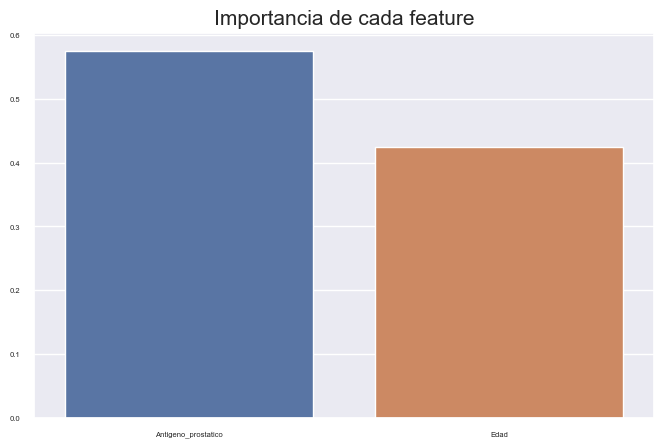

In [98]:
# Ploteamos la importancia de los atributos elegidos a la hora de hacer la predicción


plt.figure(figsize = (8,5))

importances = clf.feature_importances_
columns = X.columns
sns.barplot(x = columns, y = importances)
plt.title('Importancia de cada feature', fontsize = 15)
plt.show()

In [99]:
# Predecimos sobre nuestro set de entrenamieto

y_train_pred = clf.predict(X_train)

# Predecimos sobre nuestro set de testeo

y_test_pred = clf.predict(X_test)

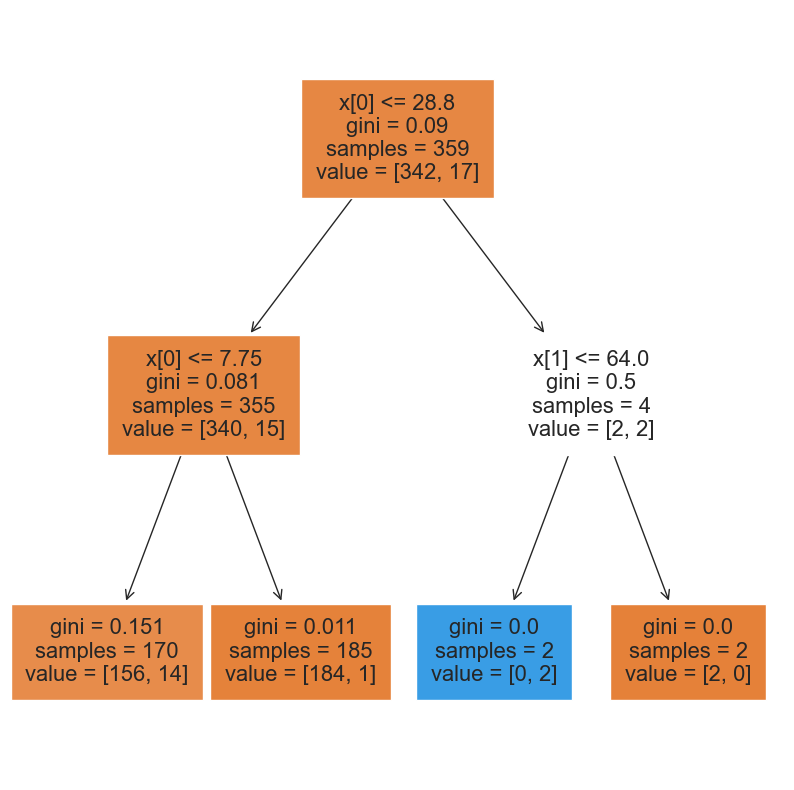

In [100]:
# Graficamos el arbol

from sklearn import tree

plt.figure(figsize = (10,10))
tree.plot_tree(clf, filled=True)
plt.show()


In [101]:
#Revisamos métricas de precisión

from sklearn.metrics import accuracy_score

print(accuracy_score(y_train,y_train_pred))

0.958217270194986


In [102]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_test_pred))

0.9333333333333333


C:\Users\Angela\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


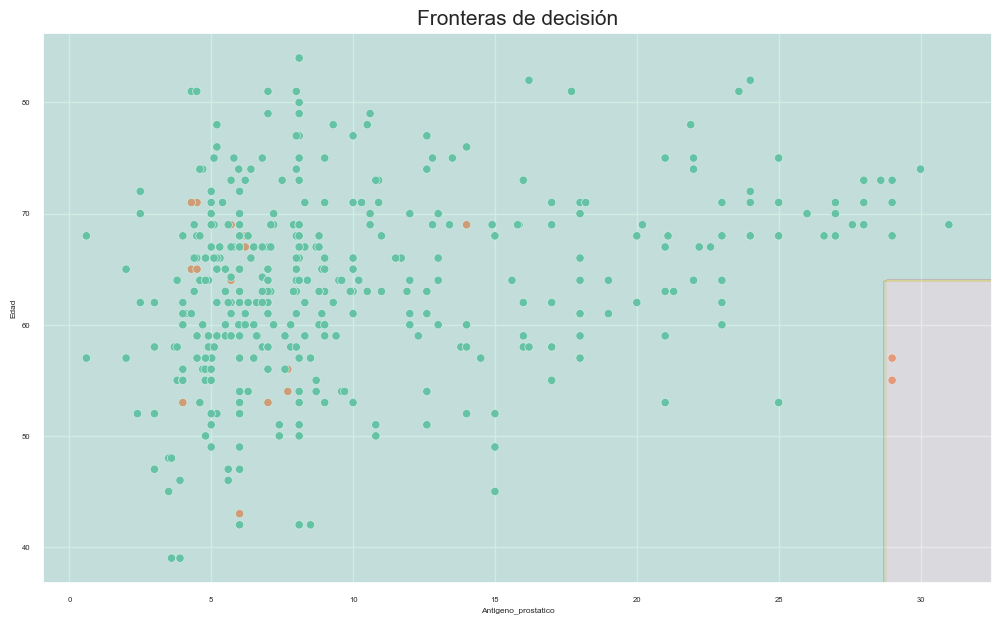

In [103]:
# Fronteras de decisión

plt.figure(figsize= (10,6))


ax = sns.scatterplot(x = X.iloc[:,0], y = X.iloc[:,1], hue= y, palette='Set2')
plt.legend().remove()


xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

contours = ax.contourf(xx, yy, Z, alpha=0.3, cmap = 'Set2')
plt.tight_layout()
plt.title('Fronteras de decisión', fontsize= 15)
plt.show()

In [104]:
# Matriz de confusión

from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_train, y_train_pred)
matrix_2 = confusion_matrix(y_test, y_test_pred)

matrix

array([[342,   0],
       [ 15,   2]], dtype=int64)

In [105]:
#el modelo detecta correctamente los Verdaderos Positivos y los Falsos Positivos
#No obstante no detecta del todo correcto a los Falsos Negativos y a los Verdaderos Negativos

In [106]:
# Evaluación del modelo

from sklearn.metrics import classification_report
print(classification_report(y_train_pred, y_train))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       357
           1       0.12      1.00      0.21         2

    accuracy                           0.96       359
   macro avg       0.56      0.98      0.59       359
weighted avg       1.00      0.96      0.97       359



In [107]:
#Para la clase 0 (no hospitalizado) el modelo tiene una alta precisión y una alta exhaustividad, por lo que maneja perfectamente la clase.<br>
#Para la clase 1 (hospitalizado) el modelo presenta baja precisión y alta exhaustividad, por lo que la clase está bien detectada pero el modelo incluye puntos de otras clases. <br>
#El modelo presenta una exactitud del 0.96

K-Vecinos

In [108]:
#Se eligen los 2 atributos para predecir la etiqueta 'hospitalizacion': 'Antigeno_prostatico' y 'Edad'

X = df[['Antigeno_prostatico', 'Edad']]  # Denotamos X con mayúscula ya que incluye más de un atributo
y = df.hospitalizacion # Etiqueta a predecir

In [ ]:
#Separamos en datos de entrenamiento y testeo
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)   

In [109]:
#Se generan listas en las que se incluiran los valores correspondientes a la media de precisión tanto para el conjunto de entrenamiento como el de evaluación.
# Además, registraremos la desviación estándar.
knn_train_scores_mean = []
knn_train_scores_std = []
knn_test_scores_mean = []
knn_test_scores_std = []

n_vecinos = np.arange(1,20,1)
i = 0
i_max = len(n_vecinos)
for vecinos in n_vecinos:
    i = i + 1
    clf = KNeighborsClassifier(n_neighbors=vecinos)
    knn_scores = cross_validate(clf, X, y, cv=5, return_train_score=True, n_jobs = -1)
    
    knn_train_scores_mean.append(knn_scores['train_score'].mean())
    knn_train_scores_std.append(knn_scores['train_score'].std())
    
    knn_test_scores_mean.append(knn_scores['test_score'].mean())
    knn_test_scores_std.append(knn_scores['test_score'].std())
    
    clear_output(wait=True)
    print('Completado: ' + str(round(i / i_max * 100, 2)) + '%')

knn_train_scores_mean = np.array(knn_train_scores_mean)
knn_train_scores_std = np.array(knn_train_scores_std)
knn_test_scores_mean = np.array(knn_test_scores_mean)
knn_test_scores_std = np.array(knn_test_scores_std)

Completado: 100.0%


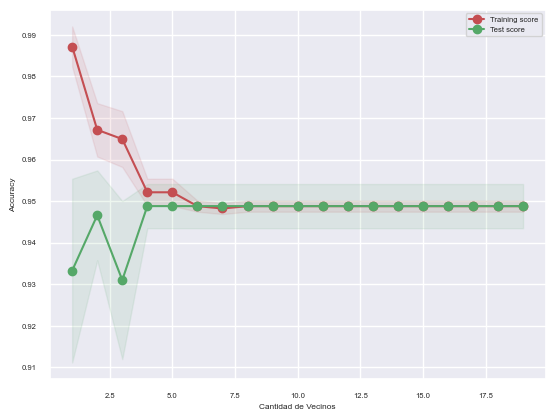

In [110]:
# Se Visualiza como varia la exactitud del modelo en base a la cantidad de vecinos para conjuntos de entrenamiento y evaluación

plt.fill_between(n_vecinos, knn_train_scores_mean - knn_train_scores_std,
                 knn_train_scores_mean + knn_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(n_vecinos, knn_test_scores_mean - knn_test_scores_std,
                 knn_test_scores_mean + knn_test_scores_std, alpha=0.1, color="g")

plt.plot(n_vecinos, knn_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(n_vecinos, knn_test_scores_mean, 'o-', color="g",
         label="Test score")

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Cantidad de Vecinos')
plt.show()

# En esta grafica visualizamos que se llega al overfitting en 6 

In [115]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciamos un objeto de la clase KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 3) #Utilizamos 3 vecinos ya que de esta manera el modelo reduce a mínimo la cantidad de Falsos Positivos y Falsos Negativos

In [116]:
# Entrenamos

clf.fit(X.values,y.values)

KNeighborsClassifier(n_neighbors=3)

In [117]:
# Predecimos sobre nuestro set de entrenamieto

y_train_pred = clf.predict(X_train)

# Predecimos sobre nuestro set de testeo

y_test_pred = clf.predict(X_test)

C:\Users\Angela\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\Angela\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [118]:
# Evaluamos

print(accuracy_score(y_test,y_test_pred))

0.9444444444444444


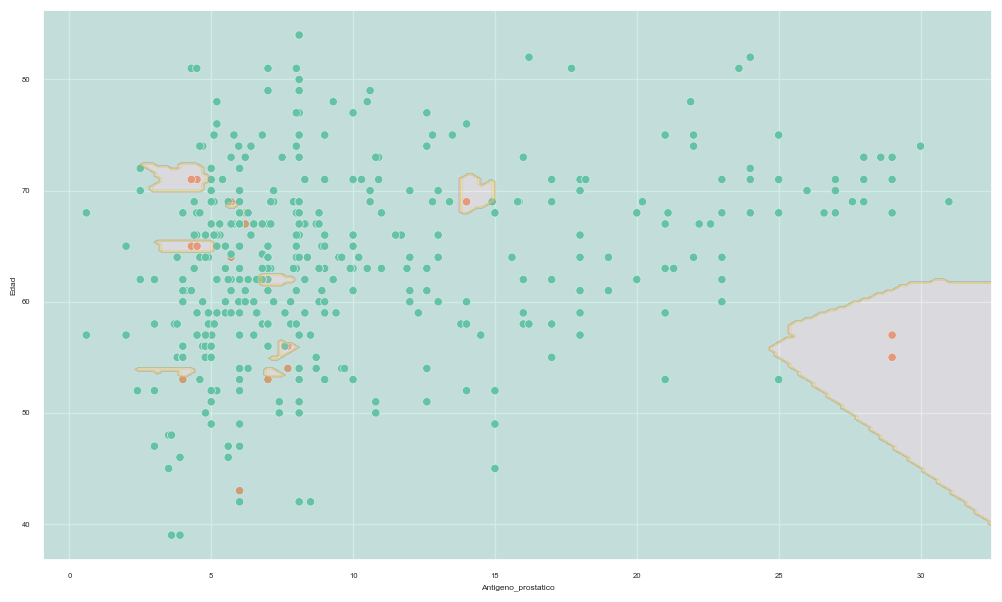

In [119]:
# Graficamos

plt.figure(figsize= (10,6))
ax = sns.scatterplot(x = X.iloc[:,0], y = X.iloc[:,1], hue=y, palette='Set2')
plt.legend().remove()


xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

contours = ax.contourf(xx, yy, Z, alpha=0.3, cmap = 'Set2')
plt.tight_layout()
plt.show()

In [120]:
# Matriz de confusión

from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_train, y_train_pred)
matrix_2 = confusion_matrix(y_test, y_test_pred)

matrix

array([[339,   3],
       [  7,  10]], dtype=int64)

In [121]:
# Evaluación del modelo

from sklearn.metrics import classification_report
print(classification_report(y_train_pred, y_train))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       346
           1       0.59      0.77      0.67        13

    accuracy                           0.97       359
   macro avg       0.79      0.87      0.83       359
weighted avg       0.98      0.97      0.97       359

